In [16]:
import geopandas as gpd
import matplotlib.pyplot as plt
from salishsea_tools import viz_tools
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cmocean.cm as cm
import xarray as xr

Typical MOAD Group locations using Salish Sea Cast

In [2]:
def plot_box(ax, corn, colour):
    ax.plot([corn[2], corn[3], corn[3], corn[2], corn[2]], 
            [corn[0], corn[0], corn[1], corn[1], corn[0]], '-', color=colour)

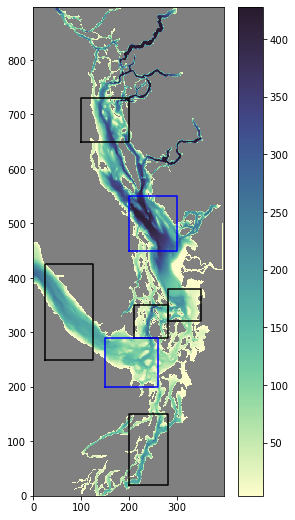

In [58]:
bathy = xr.open_dataset('/home/sallen/MEOPAR/grid/bathymetry_201702.nc')

fig, ax = plt.subplots(1, 1, figsize=(5, 9))
mycmap = cm.deep
mycmap.set_bad('grey')
im = ax.pcolormesh(bathy['Bathymetry'], cmap=mycmap)
viz_tools.set_aspect(ax);
SoG_center = [450, 550, 200, 300]
plot_box(ax, SoG_center, 'b')
SoG_north = [650, 730, 100, 200]
plot_box(ax, SoG_north, 'k') #g
SoG_south = [320, 380, 280, 350]
plot_box(ax, SoG_south, 'k')
Haro_Boundary = [290, 350, 210, 280]
plot_box(ax, Haro_Boundary, 'k') #g
JdF_east = [200, 290, 150, 260]
plot_box(ax, JdF_east, 'b')
JdF_west = [250, 425, 25, 125]
plot_box(ax, JdF_west, 'k')
PS_main = [20, 150, 200, 280]
plot_box(ax, PS_main, 'k')
SS_all = [0, 898, 0, 398]
boxes = [SS_all, SoG_south,SoG_center, SoG_north, PS_main, Haro_Boundary, JdF_west, JdF_east]
boxnames = ['SS_all', 'SoG_south', 'SoG_center', 'SoG_north', 'PS_main', 'Haro_Boundary',
           'JdF_west', 'JdF_east']
fig.colorbar(im, ax=ax);

Salish Sea Atlantis boxes

In [12]:
# Salish Sea Atlantis Model Shapefile
shapefile_name = "/ocean/rlovindeer/Atlantis/ssam_oceanparcels/SalishSea/SalishSea_July172019_2/SalishSea_July172019.shp"
ssam_df = gpd.read_file(shapefile_name)
ssam_df = ssam_df.sort_values(by=['BOX_ID'])
box_depth = ssam_df['BOTZ']
land_boxes = box_depth==0
land_boxes = ssam_df.index[land_boxes]
land_df = ssam_df.loc[land_boxes]

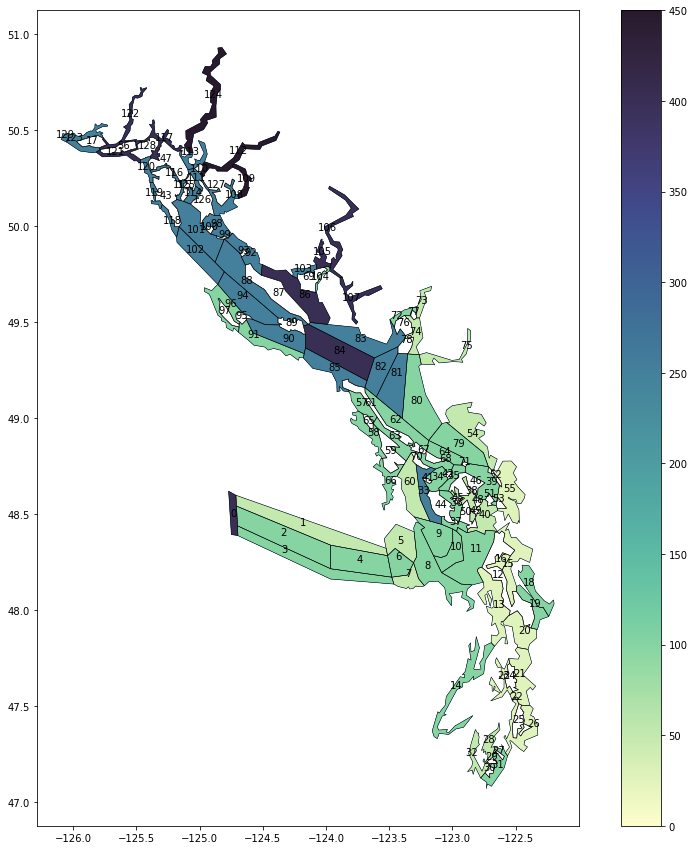

In [68]:
ax = ssam_df.plot(figsize=(15, 15))
ssam_df['coords'] = ssam_df['geometry'].apply(lambda x: x.representative_point().coords[:])
ssam_df['coords'] = [coords[0] for coords in ssam_df['coords']]
ssam_df.plot(ax=ax)
for idx, row in ssam_df.iterrows():
    plt.annotate(text=row['BOX_ID'], xy=row['coords'],
                 horizontalalignment='center')
ssam_df.plot(ax=ax, column = 'BOTZ', cmap=cm.deep, legend=True, vmin=0, vmax=450)
ssam_df.boundary.plot(ax=ax, edgecolor="black", linewidths=0.5)
land_df.plot(ax=ax, color='white');



Comparison with other EOAS Salish Sea boxes and boundaries

boxes = [SS_all, SoG_south,SoG_center, SoG_north, PS_main, Haro_Boundary, JdF_west, JdF_east]

By region of the Salish Sea

In [ ]:

JdF_west = [1,2,3,4]
JdF_east = [5,6,7,8,9,10,11]
Haro_Boundary = [60,33,34,35,36]
SoG_south = [54,64,68,79]
SoG_center = [80,81,82,83,84,85]
SoG_north = [88,92.94,98,101,102]
PS_main = [20,21,23,26]